In [19]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

In [20]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [21]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
tesla = yf.Ticker("TSLA")

In [23]:
tesla_share_price_data = tesla.history(period="max")

In [24]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [27]:
html_data = requests.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue").text

In [28]:
soup = BeautifulSoup(html_data,"html5lib")

In [29]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
#table = soup.find_all('table', {'class': 'historical_data_table table'})
for table in soup.find_all('table', attrs={'class':'historical_data_table table'}):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find('tbody').find_all('tr'):
            col=row.find_all('td')
            date=col[0].text
            revenue=col[1].text.replace("$","").replace(",","")
            tesla_revenue = tesla_revenue.append({'Date':date, 'Revenue':revenue}, ignore_index=True)

In [30]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
41,2010-09-30,31
42,2010-06-30,28
43,2010-03-31,21
45,2009-09-30,46
46,2009-06-30,27


In [31]:
gamestop = yf.Ticker("GME")

In [32]:
gamestop_share_price_data = gamestop.history(period="max")

In [33]:
gamestop_share_price_data.reset_index(inplace=True)
gamestop_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [34]:
html_data = requests.get(" https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue").text

In [35]:
soup = BeautifulSoup(html_data,"html5lib")

In [36]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
#table = soup.find_all('table', {'class': 'historical_data_table table'})
for table in soup.find_all('table', attrs={'class':'historical_data_table table'}):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find('tbody').find_all('tr'):
            col=row.find_all('td')
            date=col[0].text
            revenue=col[1].text.replace("$","").replace(",","")
            gme_revenue = gme_revenue.append({'Date':date, 'Revenue':revenue}, ignore_index=True)

In [37]:
gme_revenue.tail()

,Date,Revenue
59,2006-01-31,1667
60,2005-10-31,534
61,2005-07-31,416
62,2005-04-30,475
63,2005-01-31,709


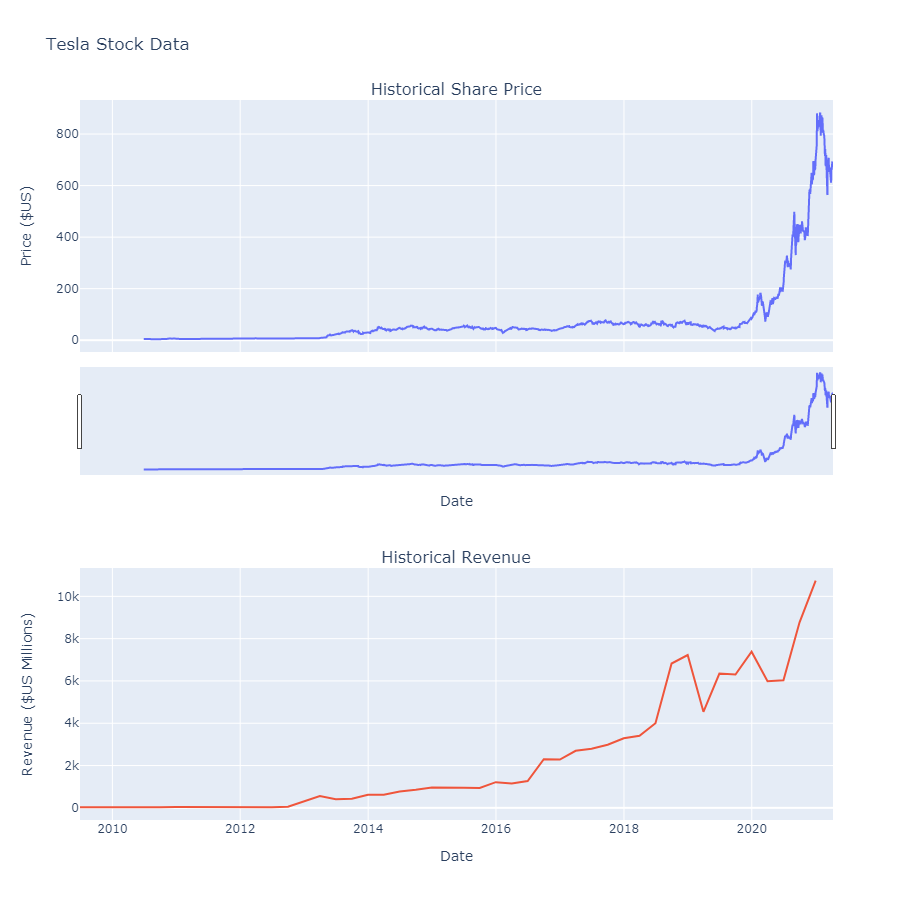

In [39]:
make_graph(tesla_share_price_data,tesla_revenue,'Tesla Stock Data')

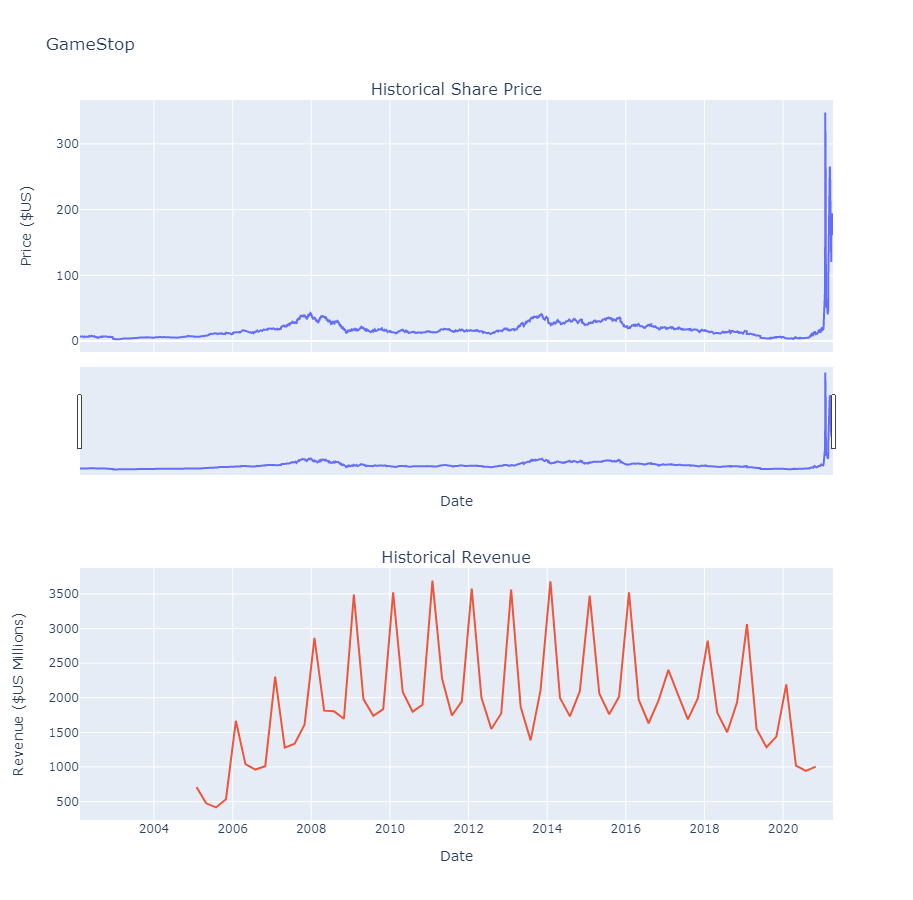

In [40]:
make_graph(gamestop_share_price_data,gme_revenue,'GameStop')